In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [334]:
glacier_list=pd.read_csv('/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/preprocessing/Glacier_list.csv',header = 2)

In [335]:
glacier_name = glacier_list['RGI index'].iloc[0]
min_n=5
max_n=100
print(glacier_name)

RGI60-13.19847


In [336]:
# plt.plot(res['run_10'])
# plt.plot(res['run_20'])

In [337]:
#####look at point by point
# run_name = 40

# for i in range(run_name):
#     result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/{i+1}_results.parquet')
#     fig,ax = plt.subplots(2,1)
#     fig.tight_layout()
#     ax[0].plot(result.Date,result.SWE)
#     ax[1].plot(result.Date,result.ICE-result.ICE.iloc[0])
#     ax[0].set_title(i+1)


In [338]:
###check weighting stategy works
#weights = [0.295871,0.163432,0.079678,0.198820,0.262198]
import datetime

mbs=[]

for run_name in np.arange(min_n,max_n+5,5):   
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/Forcing_data/{glacier_name}/coords_out_{glacier_name}.csv',header=1)
    weights = np.array(weights_df.weight)
    print(run_name)
    for i in range(len(weights)):
        try:

            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/Outputs/{glacier_name}/run_1.000/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 365)
            date_end =date_spin_complete + datetime.timedelta(days = 365)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except (IndexError,FileNotFoundError):
            weights_missed += weights[i]
            print(weights_missed)
            print(i)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    
   



5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


Text(0.5, 1.0, 'Response to N clusters: Whole glacier')

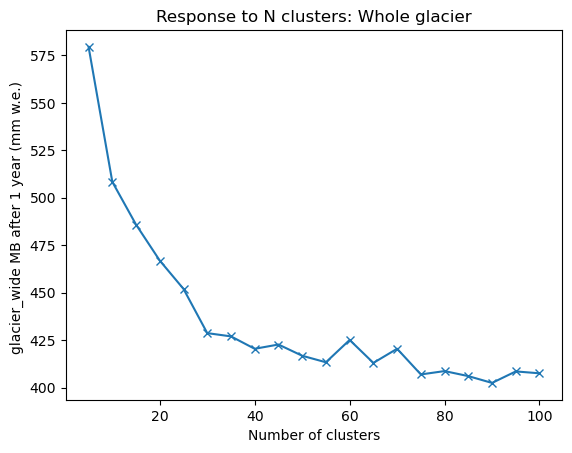

In [339]:
plt.plot(np.arange(min_n,max_n+5,5),mbs,'x',ls='-')
plt.xlabel('Number of clusters')
plt.ylabel('glacier_wide MB after 1 year (mm w.e.) ')
plt.title('Response to N clusters: Whole glacier')

In [340]:
###########now lets look at debris and clean ice separately

import datetime

mbs=[]
num_points=[]
for run_name in np.arange(min_n,max_n+5,5):   
    print(f'run: {run_name}')
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/Forcing_data/{glacier_name}/coords_out_{glacier_name}.csv',header=1)
    weights = np.array(weights_df[weights_df['deb_bool']==0].weight)

    num_points.append(len(weights))
    for i in range(len(weights)):

        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/Outputs/{glacier_name}/run_1.000/{i+1}_results.parquet')

            date_start = result.Date.iloc[0]
            date_spin_complete = date_start + datetime.timedelta(days = 365)
            date_end =date_spin_complete + datetime.timedelta(days = 365)
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
        except (FileNotFoundError,IndexError):
            weights_missed += weights[i]
            print(f'point_missing: {run_name} {i}')
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    

run: 5
run: 10
run: 15
run: 20
run: 25
run: 30
run: 35
run: 40
run: 45
run: 50
run: 55
run: 60
run: 65
run: 70
run: 75
run: 80
run: 85
run: 90
run: 95
run: 100


Text(0.5, 1.0, 'Response to N clusters: clean ice')

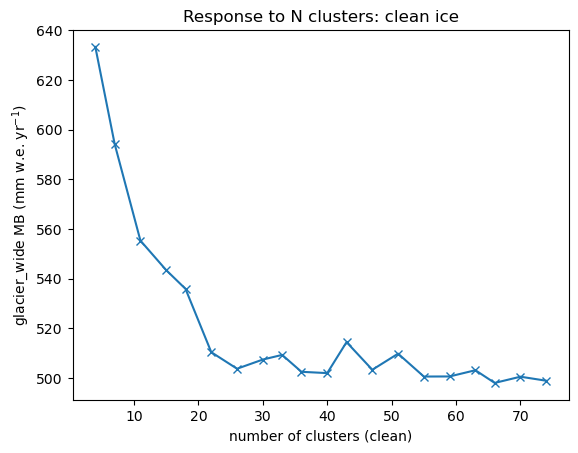

In [341]:
plt.plot(num_points,mbs,'x',ls='-')
plt.xlabel('number of clusters (clean)')
plt.ylabel(r'glacier_wide MB (mm w.e. yr$^{-1}$)')
plt.title('Response to N clusters: clean ice')

In [342]:
###########now lets look at debris and clean ice separately

import datetime

mbs=[]
num_points=[]
for run_name in np.arange(min_n,max_n+5,5):
    print(run_name)   
    weights_missed=0
    
    weights_df = pd.read_csv(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{int(run_name)}/Forcing_data/{glacier_name}/coords_out_{glacier_name}.csv',header=1)
    weights = np.array(weights_df[weights_df['deb_bool']==1].weight)
  
    clean_points = len(weights_df[weights_df['deb_bool']==0])

    num_points.append(len(weights))
    for i in range(len(weights)):
        
        try:
            result = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{run_name}/Outputs/{glacier_name}/run_1.000/{i+1+clean_points}_results.parquet')

            date_start = result.Date.iloc[0]
         
            date_spin_complete = date_start + datetime.timedelta(days = 365)
            date_end =date_spin_complete + datetime.timedelta(days = 365)
          
            result = result[(result.Date>date_spin_complete)&(result.Date<=date_end)]

            if i==0:
                snow = (result.SWE-result.SWE.iloc[0])*weights[i]
                ice = (result.ICE-result.ICE.iloc[0])*weights[i]

            else:
                snow += (result.SWE-result.SWE.iloc[0])*weights[i]
                ice += (result.ICE-result.ICE.iloc[0])*weights[i]
          
        except (IndexError,FileNotFoundError):
            weights_missed += weights[i]
            print(weights_df.deb_thickness_m.iloc[i+clean_points])
            print(weights_missed)
    mbs_rescaled = (snow+ice).iloc[-1]/(1-weights_missed)
    mbs.append(mbs_rescaled)
    

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


Text(0.5, 1.0, 'Response to N clusters: debris covered')

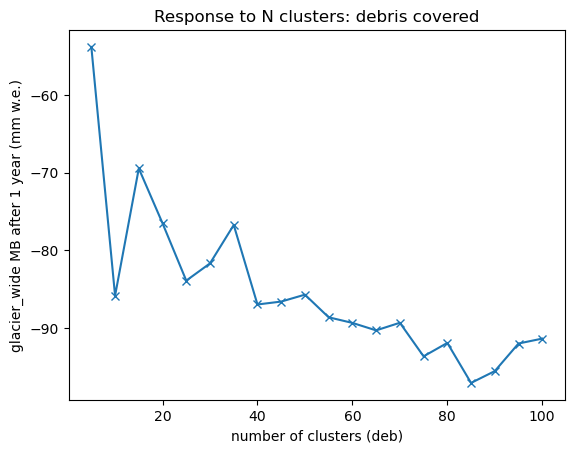

In [343]:
plt.plot(np.arange(min_n,max_n+5,5),mbs,'x',ls='-')
plt.xlabel('number of clusters (deb)')
plt.ylabel('glacier_wide MB after 1 year (mm w.e.)')
plt.title('Response to N clusters: debris covered')

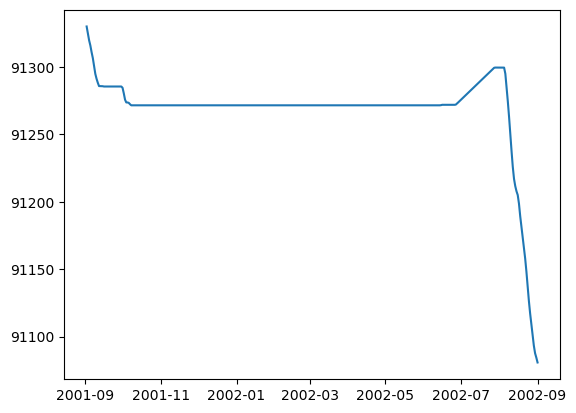

In [344]:
plt.plot(result.Date,result.ICE)

In [345]:
df_in=pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/5/Forcing_data/{glacier_list['RGI index'].iloc[1]}/5.parquet')

In [346]:
df_in[df_in.time.dt.month==12].head(50)

,time,PP,Ws,Sp,LWIN,RH,TA,SAD1,SAD2,SAB1,SAB2,PARB,PARD
2184,2000-12-01 00:00:00,0.000000,0.237066,635.284668,126.593510,19.836659,-24.008100,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2185,2000-12-01 01:00:00,0.000000,0.267307,634.966283,127.654350,18.619619,-23.818748,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2186,2000-12-01 02:00:00,0.000000,0.275439,634.784164,127.300736,17.980940,-23.717749,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2187,2000-12-01 03:00:00,0.000000,0.276981,634.813694,126.947123,17.536168,-23.641001,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2188,2000-12-01 04:00:00,0.000000,0.276943,634.407425,126.593510,17.448493,-23.646644,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2189,2000-12-01 05:00:00,0.000000,0.269542,634.454064,126.416704,17.339329,-23.625475,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2190,2000-12-01 06:00:00,0.000000,0.261130,634.467095,125.979564,17.443528,-23.095417,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000
2191,2000-12-01 07:00:00,0.000000,0.248624,634.458766,125.709477,17.611613,-23.058942,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2192,2000-12-01 08:00:00,0.000000,0.221458,634.499089,125.886284,17.852065,-22.920093,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
2193,2000-12-01 09:00:00,0.000000,0.196834,634.737470,126.770317,18.199770,-22.229804,38.733671,20.371657,3.575347e+01,8.957638e+01,3.492624e+01,32.832308


In [347]:
#look at the results

df_out = pd.read_parquet('/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/5/Outputs/RGI60-13.18096/run_1.000/5_results.parquet')

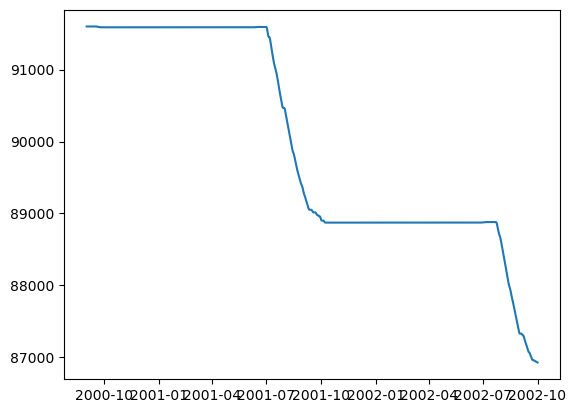

In [348]:
plt.plot(df_out.Date,df_out.ICE)

In [349]:
glacier_list.iloc[1]

Glacier_name                                       Abramov
RGI index                                   RGI60-13.18096
region                                               Pamir
Main influence by ISM, SAM or westerlies               NaN
debris?                                         low-medium
season of accummulation                                NaN
Glacier area                                          21.3
slope (RGI)                                           10.0
Min Altitude                                        3610.0
Max Altitude                                        4860.0
Avalanche frequency?                                   NaN
Unnamed: 11                                            NaN
Name: 1, dtype: object

In [350]:
###study how same debris point produces different results!

###load all results for Abramov
df_out_dict={}
for N in range (1,8):
    N=N*5
    df_out_dict[f'{N}'] = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{N}/Outputs/RGI60-13.18096/run_1.000/{N+1}_results.parquet').ICE.iloc[0]
for N in range (9,21):
    N=N*5
    df_out_dict[f'{N}'] = pd.read_parquet(f'/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment/{N}/Outputs/RGI60-13.18096/run_1.000/{N}_results.parquet').ICE.iloc[0]
    


In [351]:
df_out_dict

{'5': np.float64(91599.99832843489),
 '10': np.float64(91599.99832843489),
 '15': np.float64(91599.99832843489),
 '20': np.float64(91599.99832843489),
 '25': np.float64(91599.99832843489),
 '30': np.float64(91599.99832843489),
 '35': np.float64(91599.99832843489),
 '45': np.float64(91599.99832843489),
 '50': np.float64(91599.99832843489),
 '55': np.float64(91599.99832843489),
 '60': np.float64(91599.99832843489),
 '65': np.float64(91599.99832843489),
 '70': np.float64(91599.99832843489),
 '75': np.float64(91599.99832843489),
 '80': np.float64(91599.99832843489),
 '85': np.float64(91599.99832843489),
 '90': np.float64(91599.99832843489),
 '95': np.float64(91599.99832843489),
 '100': np.float64(91599.99832843489)}